In [1]:
setwd('/import/DB/zhang//data')

In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
daa = readRDS('./scRNA.rename.rds')

In [4]:
DefaultAssay(daa) = 'RNA'

In [5]:
library(Seurat)

In [6]:
Idents(daa) = 'celltype'

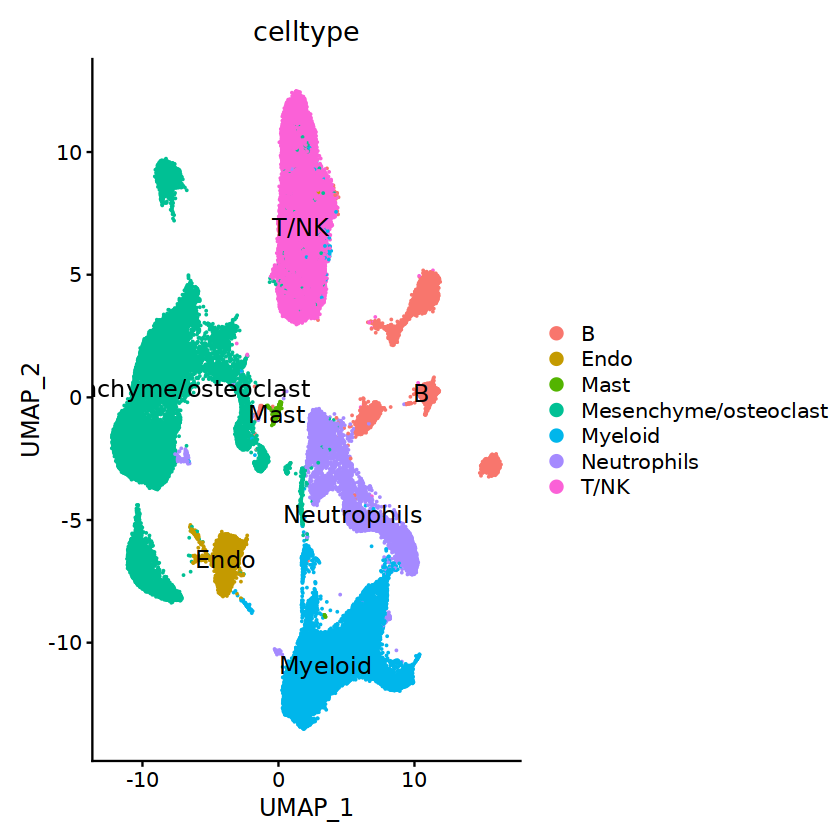

In [7]:
DimPlot(daa, group.by="celltype", label=T, label.size=5, reduction='umap')

In [8]:
OS = subset(daa,celltype =='Myeloid')

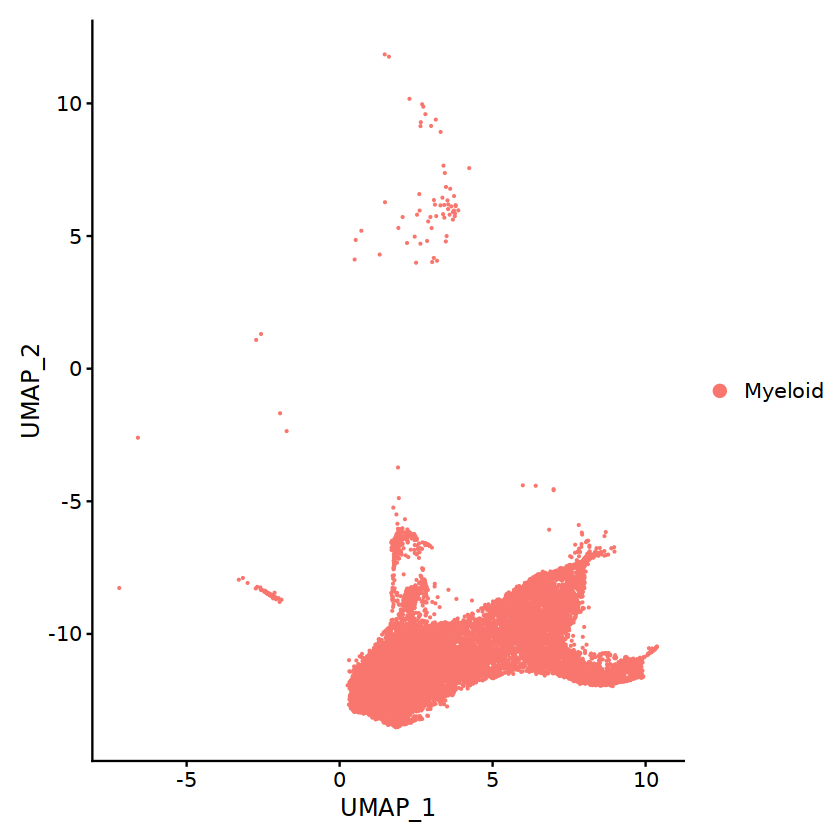

In [9]:
DimPlot(OS)

In [10]:
mca2=CreateSeuratObject(OS@assays$RNA@data,assay = "RNA",min.cells =10 ,meta.data = OS@meta.data)
immune.combined = mca2
immune.combined

An object of class Seurat 
20130 features across 14538 samples within 1 assay 
Active assay: RNA (20130 features, 0 variable features)

In [11]:


library(harmony)

DefaultAssay(immune.combined) = 'RNA'

table(OS$orig.ident)

sceList <- SplitObject(immune.combined, split.by = "orig.ident")

single.ob=merge(sceList[[1]],sceList[2:length(sceList)])

DefaultAssay(single.ob) = 'RNA'

scRNA_harmony = single.ob

scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})

scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:50)

scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:50) %>% FindClusters(resolution =  0.2)
##作图
#group_by_cluster

Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.2.3"



          C1           C2           C3           C4           S1           S2 
         641          290           66          186          309          537 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
         149          224         3475         1019         2153         1414 
WH2203005877 
        4075 

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony converged after 9 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
 14.308   7.185  12.179 

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
08:21:14 UMAP embedding parameters a = 0.9922 b = 1.112

08:21:14 Read 14538 rows and found 50 numeric columns

08:21:14 Using Annoy for neighbor search, n_neighbors = 30

08:21:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:21:15 Writing NN index file to temp file /tmp/RtmpSot6fc/fileeb0921321f0b

08:21:15 Searching Annoy index using 1 thread, search_k = 3000

08:21:19 Annoy recall = 100%

08:21:19 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14538
Number of edges: 644707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9487
Number of communities: 11
Elapsed time: 3 seconds


In [12]:
options(repr.plot.width = 12,repr.plot.height = 8)

In [13]:
table(scRNA_harmony$group)


     OS control 
  12136    2402 

In [14]:
options(repr.plot.width = 8,repr.plot.height = 6)

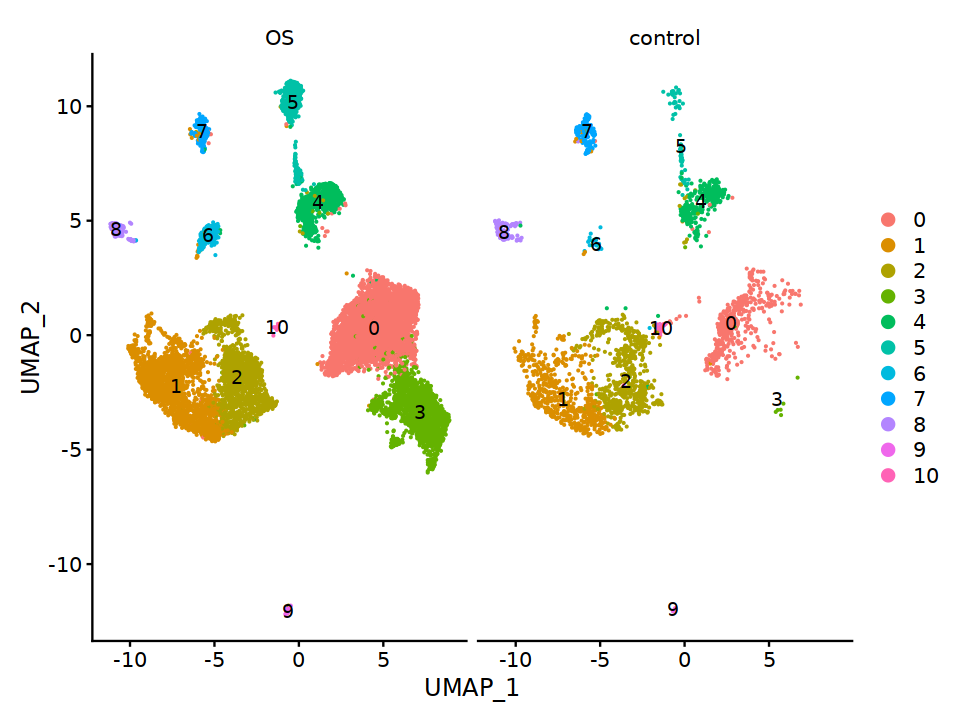

In [15]:
DimPlot(scRNA_harmony, reduction = "umap", split.by = "group",ncol = 2,label = T)

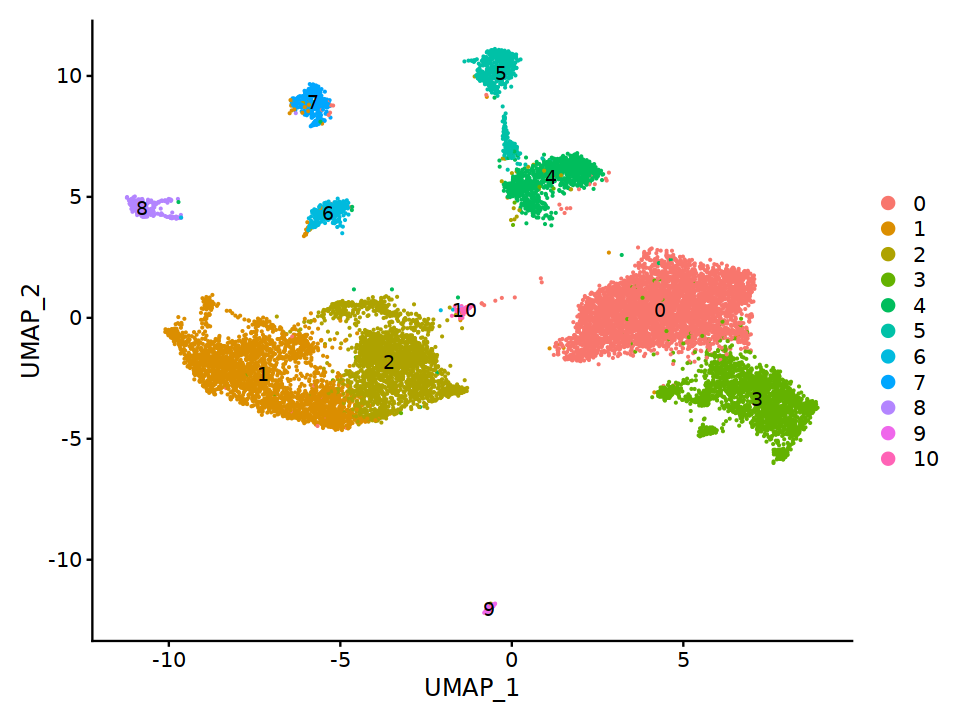

In [16]:
DimPlot(scRNA_harmony, reduction = "umap", label=T) 

In [17]:
test.seu = scRNA_harmony

In [18]:
s.genes=Seurat::cc.genes.updated.2019$s.genes
g2m.genes=Seurat::cc.genes.updated.2019$g2m.genes
test.seu <- CellCycleScoring(test.seu, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

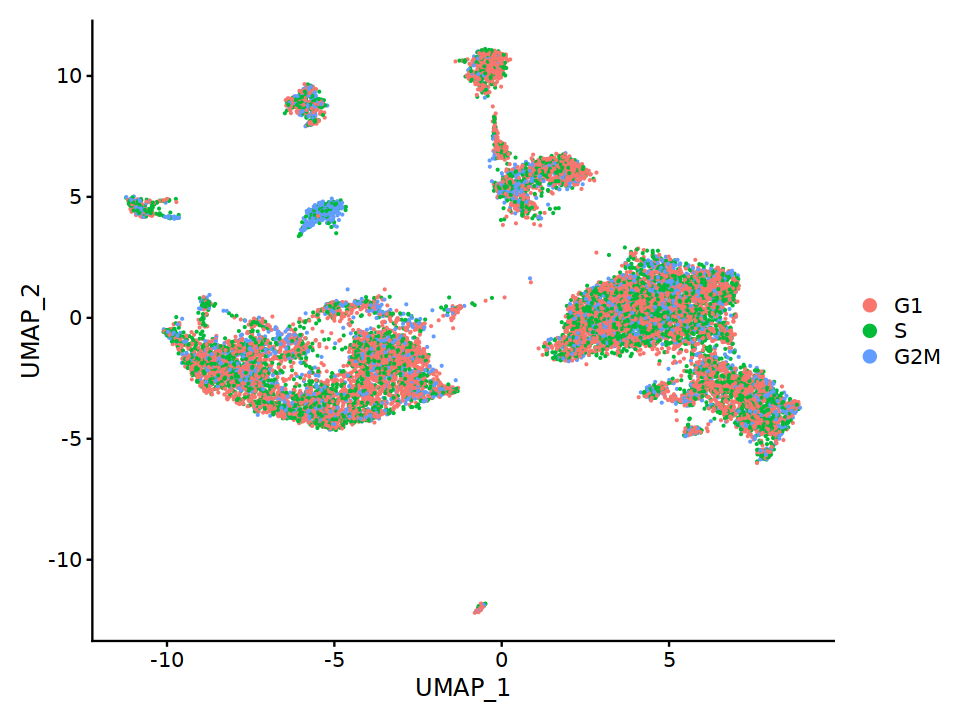

In [19]:
DimPlot(test.seu,reduction = "umap")

In [20]:
immune.combined = test.seu

In [ ]:
scRNAlist =  SplitObject(immune.combined, split.by = "orig.ident")
scRNA_harmony <- merge(scRNAlist[[1]], y=scRNAlist[2:length(scRNAlist)])
DefaultAssay(scRNA_harmony) = 'RNA'
library(harmony)
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData(vars.to.regress = c("S.Score", "G2M.Score"),
                                                                                       features = rownames(.)) %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:50)
scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:50)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:50) %>% FindClusters(resolution =  0.1)
##作图
#group_by_cluster
plot1 = DimPlot(scRNA_harmony, reduction = "umap", label=T) 

Regressing out S.Score, G2M.Score



In [ ]:
plot1

In [81]:
SCE = subset(SCE,idents = c(0,1,2,3,4,5,6,8))

In [82]:
DefaultAssay(SCE) = 'RNA'
Idents(SCE) = 'seurat_clusters'
DefaultAssay(SCE) = 'RNA'
sce.markers <- FindAllMarkers(object = SCE, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

write.csv(sce.markers,file = 'Myeloid.sce.markers.csv')

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 8



In [83]:
Idents(SCE)  ='seurat_clusters'

celltype = data.frame(
    cluster = c(0,1,2,3,4,5,6,8),
    celltype = c('M2_mac','cDC2','M1_mac',
                'TAM1','TAM2','OCs','prof mac','cDC1'
                )
)

for(i in 1:nrow(celltype)){
  SCE@meta.data[which(SCE@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [84]:
# 0  M2 Mac
# 1 cDC2
# 2 M1 macro
# 3 TAM1
# 4 TAM2
# 5 oc
# 6 prof macro
# 7 unknonw
# 8 cDC1
# 9 10 unknown


In [85]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

In [86]:
library(ggplot2)

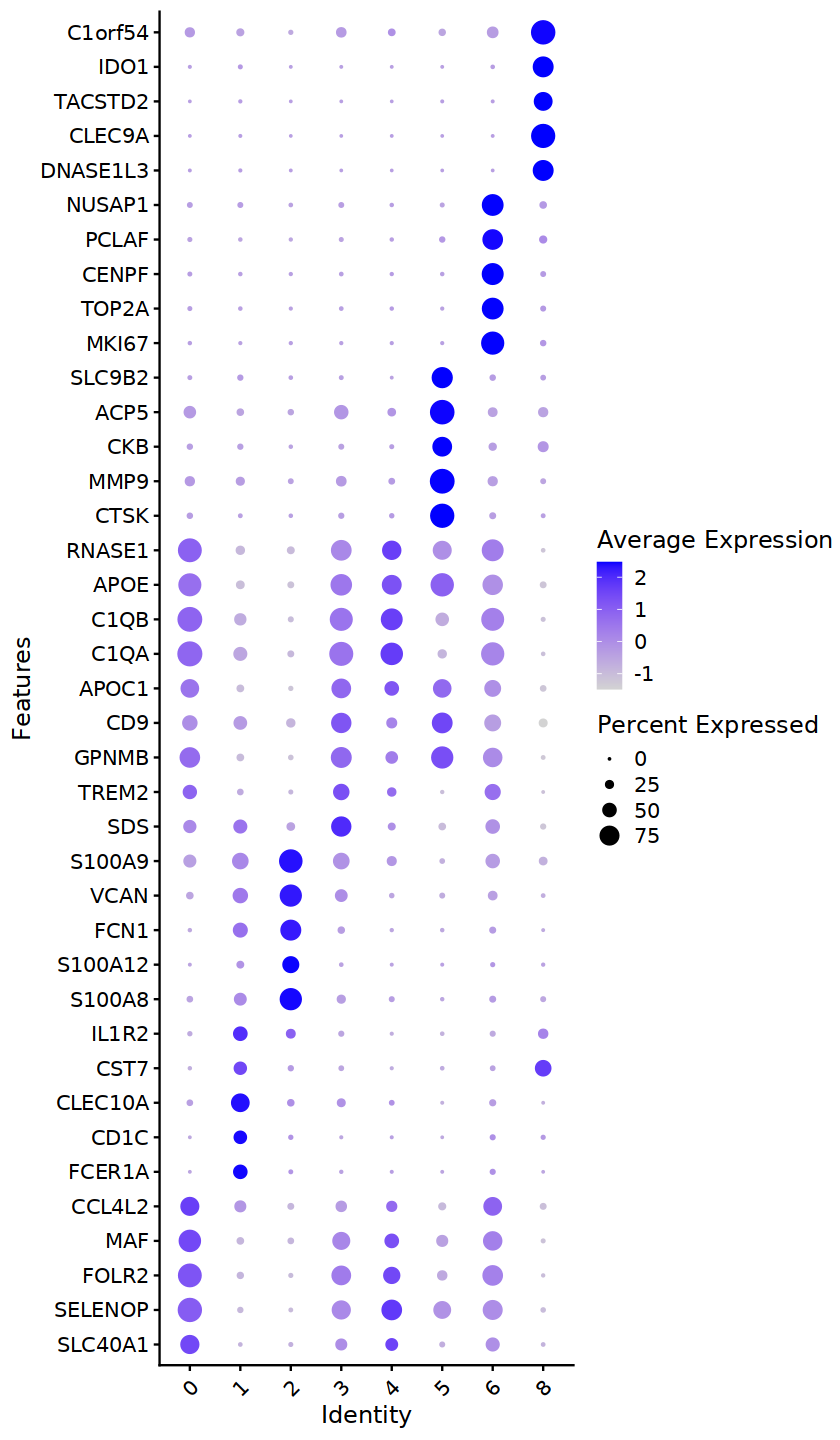

In [87]:
options(repr.plot.height = 12,repr.plot.width = 7)

 DotPlot(SCE, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [88]:
saveRDS(SCE,file = 'Mye.final.rds')

In [4]:
SCE = readRDS('./Mye.final.rds')

In [5]:
colnames(SCE@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "RNA_snn_res.0.8"                   "seurat_clusters"                  
 [7] "pANN_0.25_0.19_5878"               "DF.classifications_0.25_0.19_5878"
 [9] "RNA_snn_res.0.3"                   "group"                            
[11] "celltype"                          "barcode"                          
[13] "sample"                            "RNA_snn_res.0.2"

In [7]:
Idents(SCE) ='celltype'

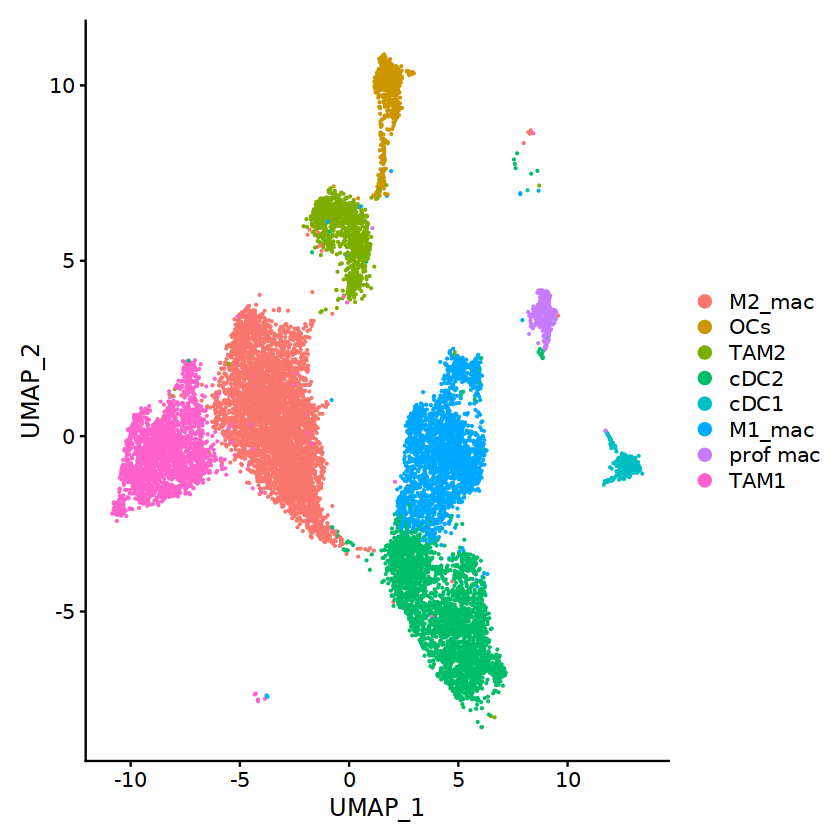

In [8]:
DimPlot(SCE,reduction = "umap")

In [9]:
scedata = SCE

In [10]:
scedata$orig.ident = scedata$sample

In [11]:
Idents(scedata) = 'celltype'

In [12]:
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数


          C1           C2           C3           C4           S1           S2 
         561          261           55          149          303          519 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
         145          214         3363          993         2119         1346 
WH2203005877 
        3990 


    M2_mac        OCs       TAM2       cDC2       cDC1     M1_mac   prof mac 
0.32422600 0.04166072 0.07369097 0.19446426 0.02090170 0.16842631 0.02453988 
      TAM1 
0.15209017 

          
             C1   C2   C3   C4   S1   S2   S3   S4 WH2109002886 WH2109013167
  M2_mac    214   84    5    6   58   74    1    1         1594          486
  OCs        29   13    1   11    4    4    5    1          219           18
  TAM2      104   50    8   24   49   45   12    9          261           95
  cDC2      122   55   30   73   60  127   26   68          352          133
  cDC1       32   38    4   19    4   20    6   12           27           48
  M1_mac     53   20    7   16  128  242   81  117          177           30
  prof mac    6    1    0    0    0    6    8    6          161           42
  TAM1        1    0    0    0    0    1    6    0          572          141
          
           WH2112008442 WH2201006389 WH2203005877
  M2_mac            776          605          641
  OCs               183           87            9
  TAM2              139          147           90
  cDC2              192          179         1309
  cDC1               13            

In [13]:
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- data.frame(Cellratio)

In [14]:
library(reshape2)
cellper <- dcast(Cellratio,Var2~Var1, value.var = "Freq")#长数据转为宽数据
rownames(cellper) <- cellper[,1]
cellper <- cellper[,-1]

Warning message:
"package 'reshape2' was built under R version 4.2.3"


In [15]:
sample <- rownames(cellper)

In [16]:
sample

[1] "C1"           "C2"           "C3"           "C4"           "S1"          
 [6] "S2"           "S3"           "S4"           "WH2109002886" "WH2109013167"
[11] "WH2112008442" "WH2201006389" "WH2203005877"

In [21]:
scRNA = SCE

In [22]:
group <- c(rep('Con',8),rep('OS',5))


samples <- data.frame(sample, group)#创建数据框

rownames(samples)=samples$sample
cellper$sample <- samples[rownames(cellper),'sample']#R添加列
cellper$group <- samples[rownames(cellper),'group']#R添加列

###作图展示
pplist = list()
sce_groups = unique(scRNA$celltype)


In [23]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(cowplot)
for(group_ in sce_groups){
  cellper_  = cellper %>% select(one_of(c('sample','group',group_)))#选择一组数据
  colnames(cellper_) = c('sample','group','percent')#对选择数据列命名
  cellper_$percent = as.numeric(cellper_$percent)#数值型数据
  cellper_ <- cellper_ %>% group_by(group) %>% mutate(upper =  quantile(percent, 0.75), 
                                                      lower = quantile(percent, 0.25),
                                                      mean = mean(percent),
                                                      median = median(percent))#上下分位数
# print(group_)
print(cellper_$median)
      pp1 = ggplot(cellper_,aes(x=group,y=percent)) + #ggplot作图
    geom_jitter(shape = 21,aes(fill=group),width = 0.25) + 
    stat_summary(fun=mean, geom="point", color="grey60") +
    theme_cowplot() +
    theme(axis.text = element_text(size = 10),axis.title = element_text(size = 10),legend.text = element_text(size = 10),
          legend.title = element_text(size = 10),plot.title = element_text(size = 10,face = 'plain'),legend.position = 'none') + 
    labs(title = group_,y='Percentage') +
    geom_errorbar(aes(ymin = lower, ymax = upper),col = "grey60",width =  1)
  
  ###组间t检验分析
  labely = max(cellper_$percent)
  compare_means(percent ~ group,  data = cellper_)
  my_comparisons <- list( c("Con", "OS") )
  pp1 = pp1 + stat_compare_means(comparisons = my_comparisons,size = 3,method = "t.test")
  pplist[[group_]] = pp1
}
  

 [1] 0.1167455 0.1167455 0.1167455 0.1167455 0.1167455 0.1167455 0.1167455
 [8] 0.1167455 0.4494799 0.4494799 0.4494799 0.4494799 0.4494799
 [1] 0.02633229 0.02633229 0.02633229 0.02633229 0.02633229 0.02633229
 [7] 0.02633229 0.02633229 0.06463596 0.06463596 0.06463596 0.06463596
[13] 0.06463596
 [1] 0.15326419 0.15326419 0.15326419 0.15326419 0.15326419 0.15326419
 [7] 0.15326419 0.15326419 0.07760928 0.07760928 0.07760928 0.07760928
[13] 0.07760928
 [1] 0.2310851 0.2310851 0.2310851 0.2310851 0.2310851 0.2310851 0.2310851
 [8] 0.2310851 0.1329866 0.1329866 0.1329866 0.1329866 0.1329866
 [1] 0.056557882 0.056557882 0.056557882 0.056557882 0.056557882 0.056557882
 [7] 0.056557882 0.056557882 0.008028546 0.008028546 0.008028546 0.008028546
[13] 0.008028546
 [1] 0.27485749 0.27485749 0.27485749 0.27485749 0.27485749 0.27485749
 [7] 0.27485749 0.27485749 0.05263158 0.05263158 0.05263158 0.05263158
[13] 0.05263158
 [1] 0.007263302 0.007263302 0.007263302 0.007263302 0.007263302 0.00726330

In [24]:
options(repr.plot.height = 8,repr.plot.width = 9)

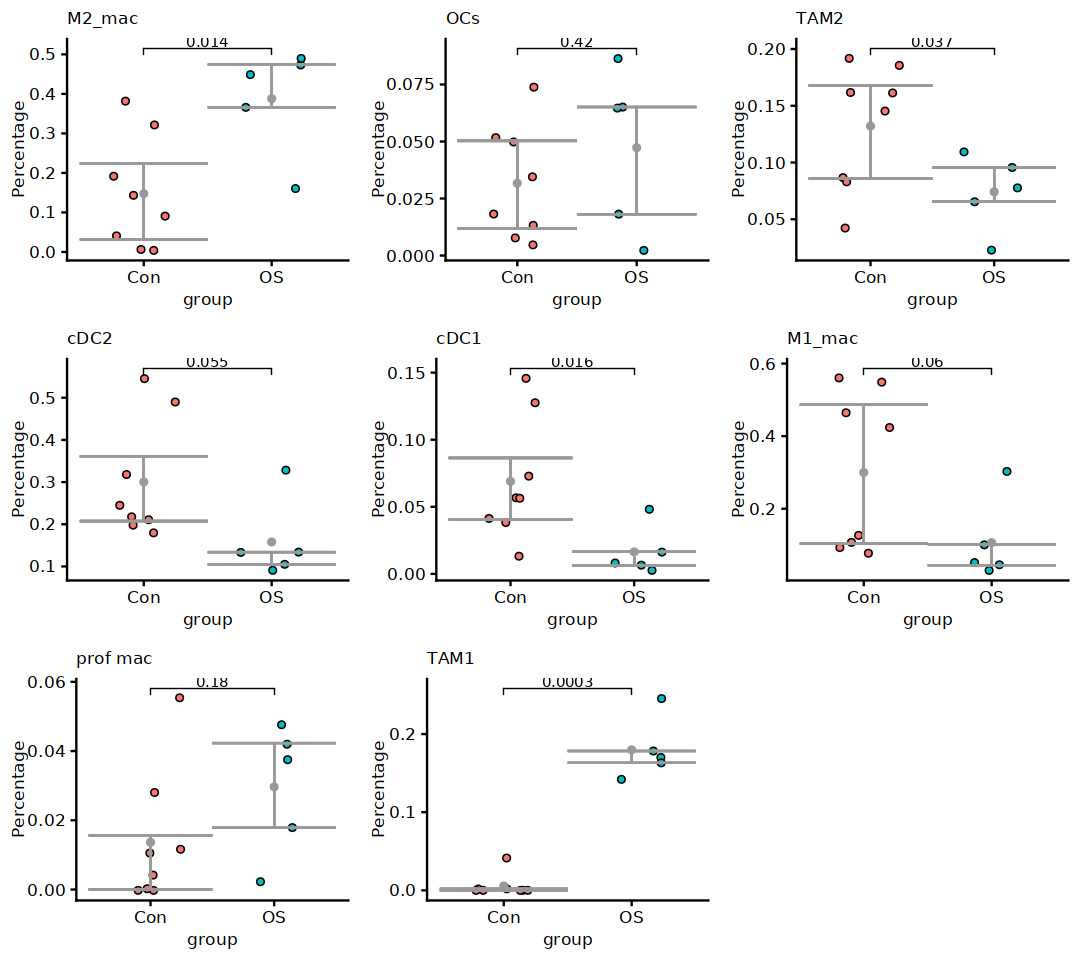

In [25]:
 library(cowplot)
plot_grid(pplist[[1]],
          pplist[[2]],
          pplist[[3]],
          pplist[[4]],
          pplist[[5]],
          pplist[[6]],
          pplist[[7]],
          pplist[[8]])


          C1           C2           C3           C4           S1           S2 
         561          261           55          149          303          519 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
         145          214         3363          993         2119         1346 
WH2203005877 
        3990 


    M2_mac        OCs       TAM2       cDC2       cDC1     M1_mac   prof mac 
0.32422600 0.04166072 0.07369097 0.19446426 0.02090170 0.16842631 0.02453988 
      TAM1 
0.15209017 

          
             OS control
  M2_mac   4102     443
  OCs       516      68
  TAM2      732     301
  cDC2     2165     561
  cDC1      158     135
  M1_mac   1697     664
  prof mac  317      27
  TAM1     2124       8

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"package 'ggalluvial' was built under R version 4.2.3"


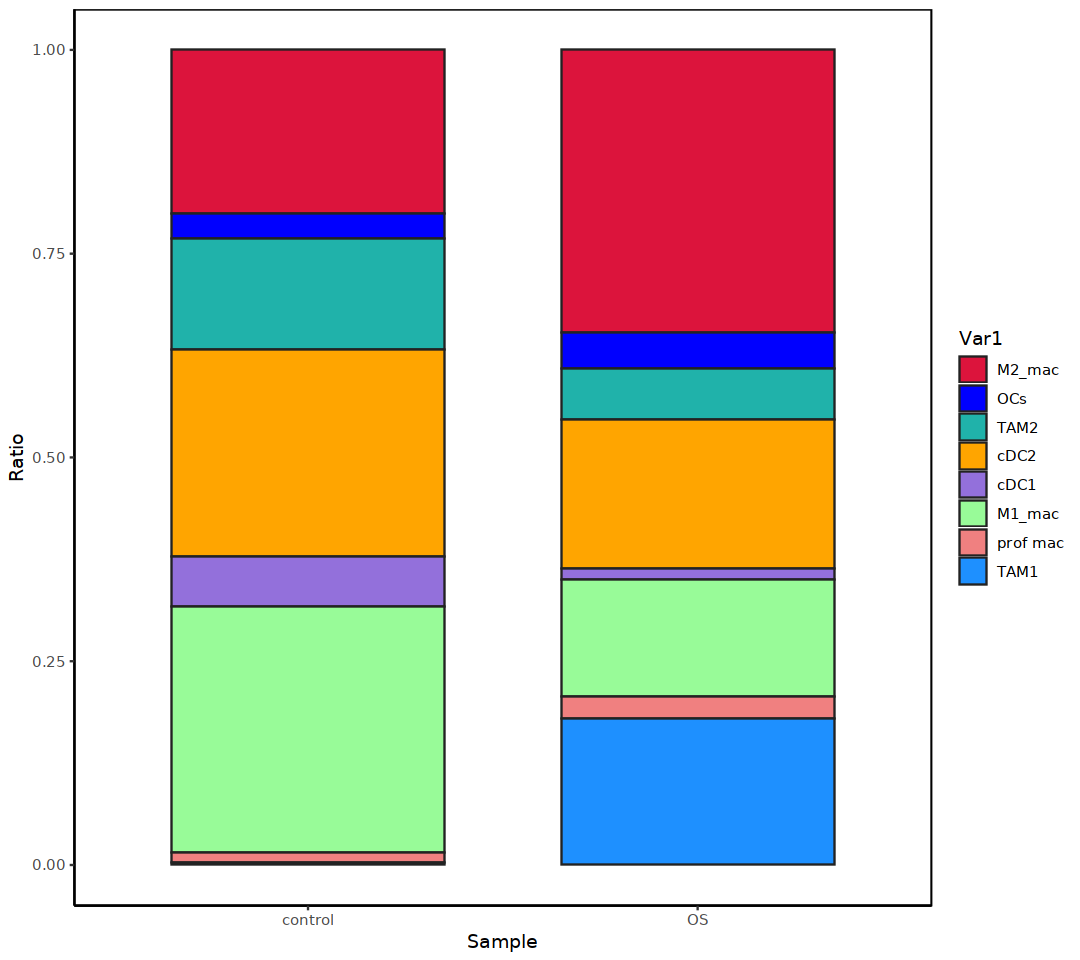

In [26]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('control','OS'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

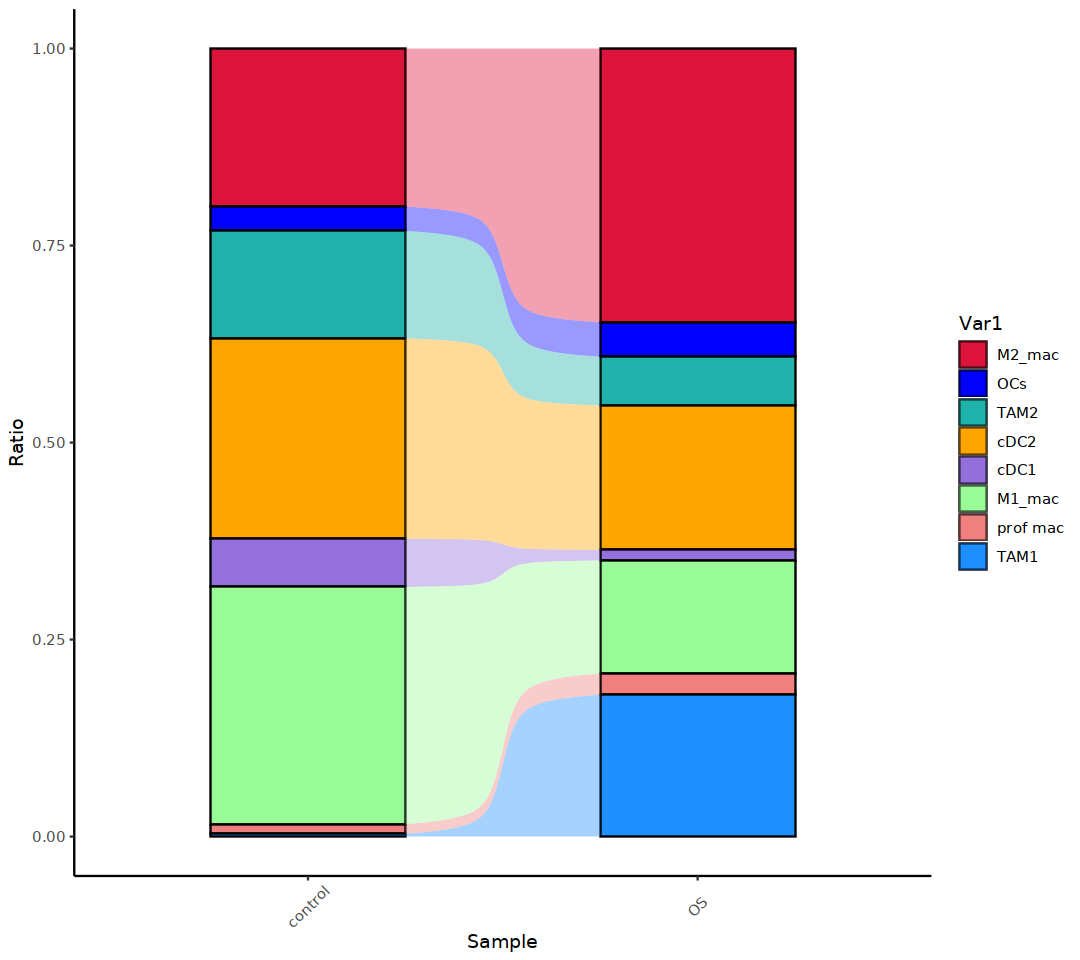

In [27]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [28]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)

Loading required package: edgeR

Warning message:
"package 'edgeR' was built under R version 4.2.3"
Loading required package: limma

Warning message:
"package 'limma' was built under R version 4.2.3"
Warning message:
"package 'SingleCellExperiment' was built under R version 4.2.2"
Loading required package: SummarizedExperiment

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMed

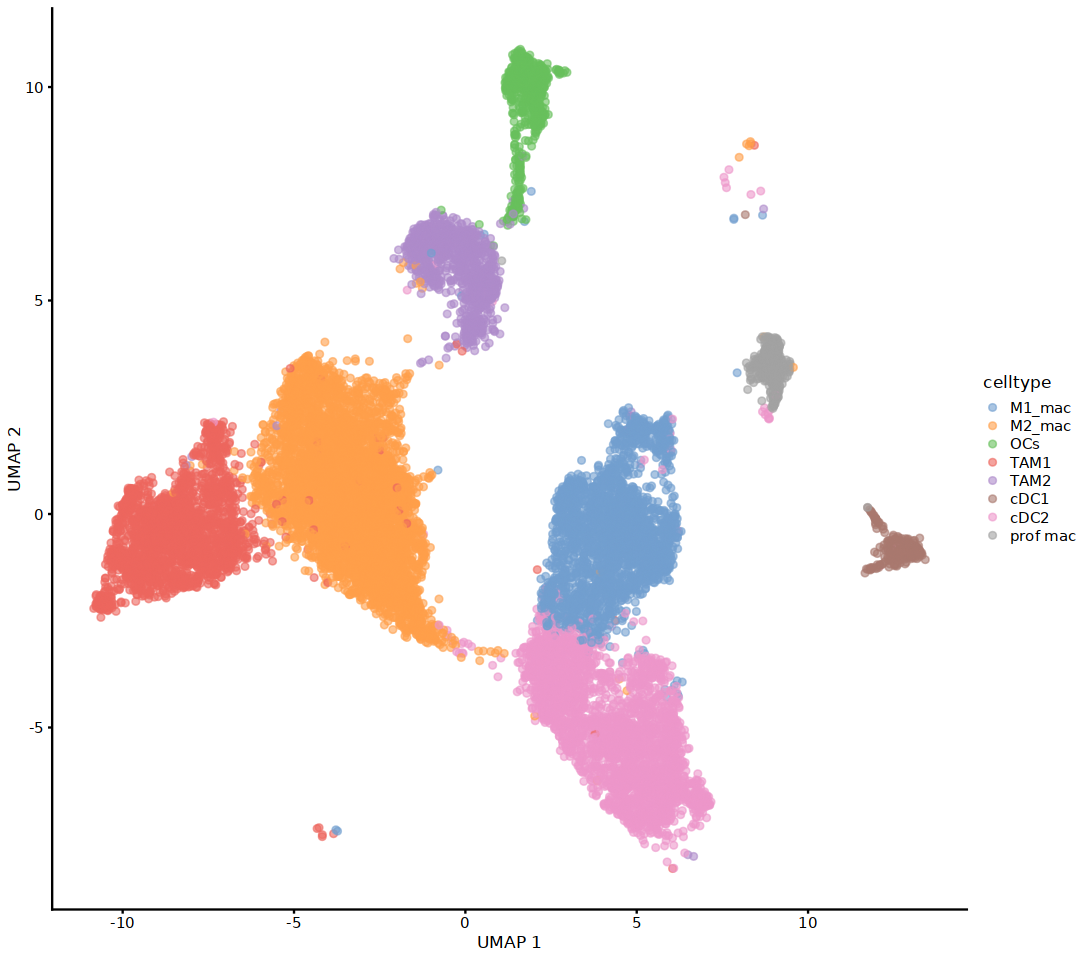

In [29]:
sce <- as.SingleCellExperiment(scedata)
 
#Visualize the data
plotReducedDim(sce, colour_by="celltype", dimred = "UMAP") 

Constructing kNN graph with k:20

Checking valid object

Running refined sampling with reduced_dim

Checking meta.data validity

Counting cells in neighbourhoods

  [[ suppressing 13 column names 'C1', 'C2', 'C3' ... ]]



6 x 13 sparse Matrix of class "dgCMatrix"
                                 
1 66 31 . .  . . . .  .  . . .  .
2  .  . . .  . . . . 43  . . .  .
3  .  . . .  . . . .  .  . . . 35
4  .  . . .  . . . .  .  . . . 51
5  .  . . .  . . . .  2 21 4 .  6
6  .  . . . 29 6 . 3  .  . . .  .

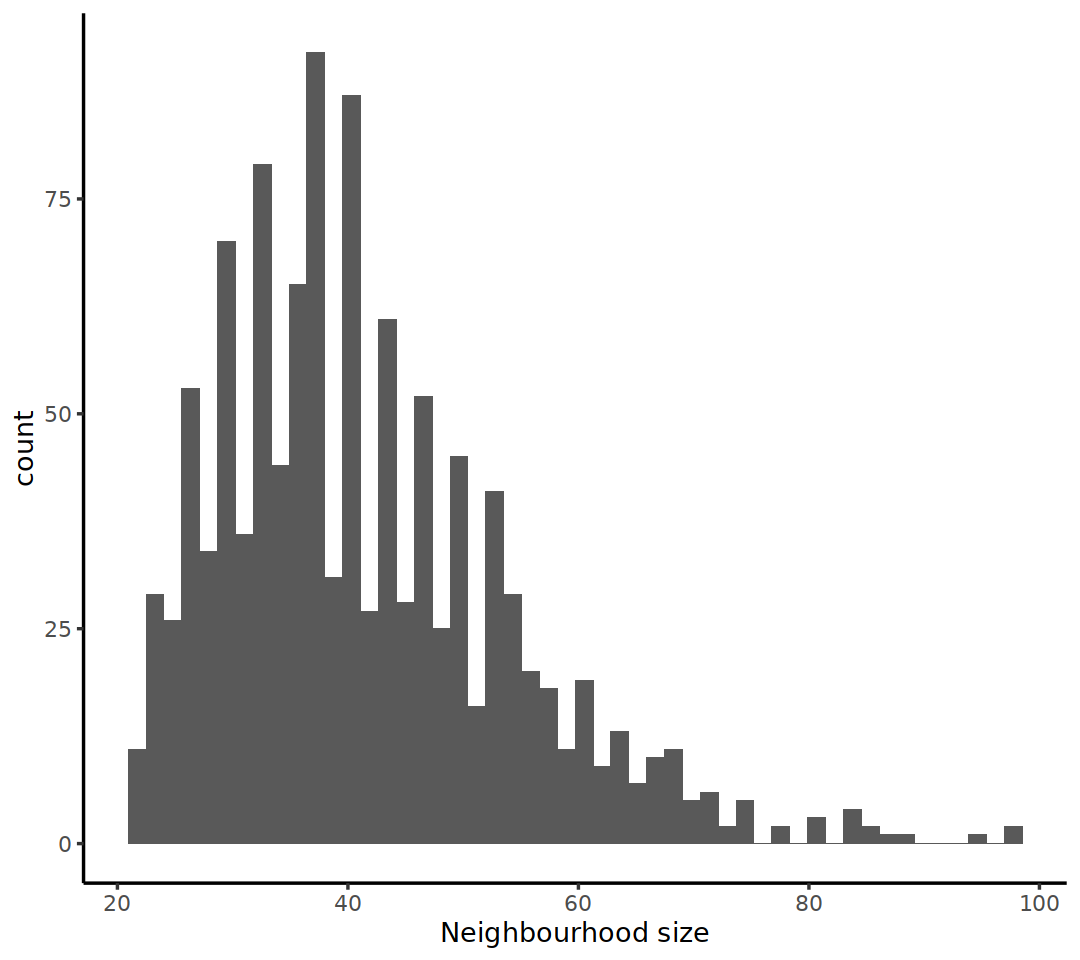

In [30]:
scmilo <- Milo(sce)
 
#Construct KNN graph
scmilo <- buildGraph(scmilo, k = 20, d = 20,reduced.dim = "PCA")
 
#Defining representative neighbourhoods on the KNN graph
set.seed(10)
scmilo <- makeNhoods(scmilo, prop = 0.1,
                     k = 20, d = 20, 
                     refined = TRUE, reduced_dims = "PCA")
plotNhoodSizeHist(scmilo)
 
#Counting cells in neighbourhoods
scmilo <- countCells(scmilo, 
                     meta.data = as.data.frame(colData(scmilo)), 
                     sample = "sample")
head(nhoodCounts(scmilo))

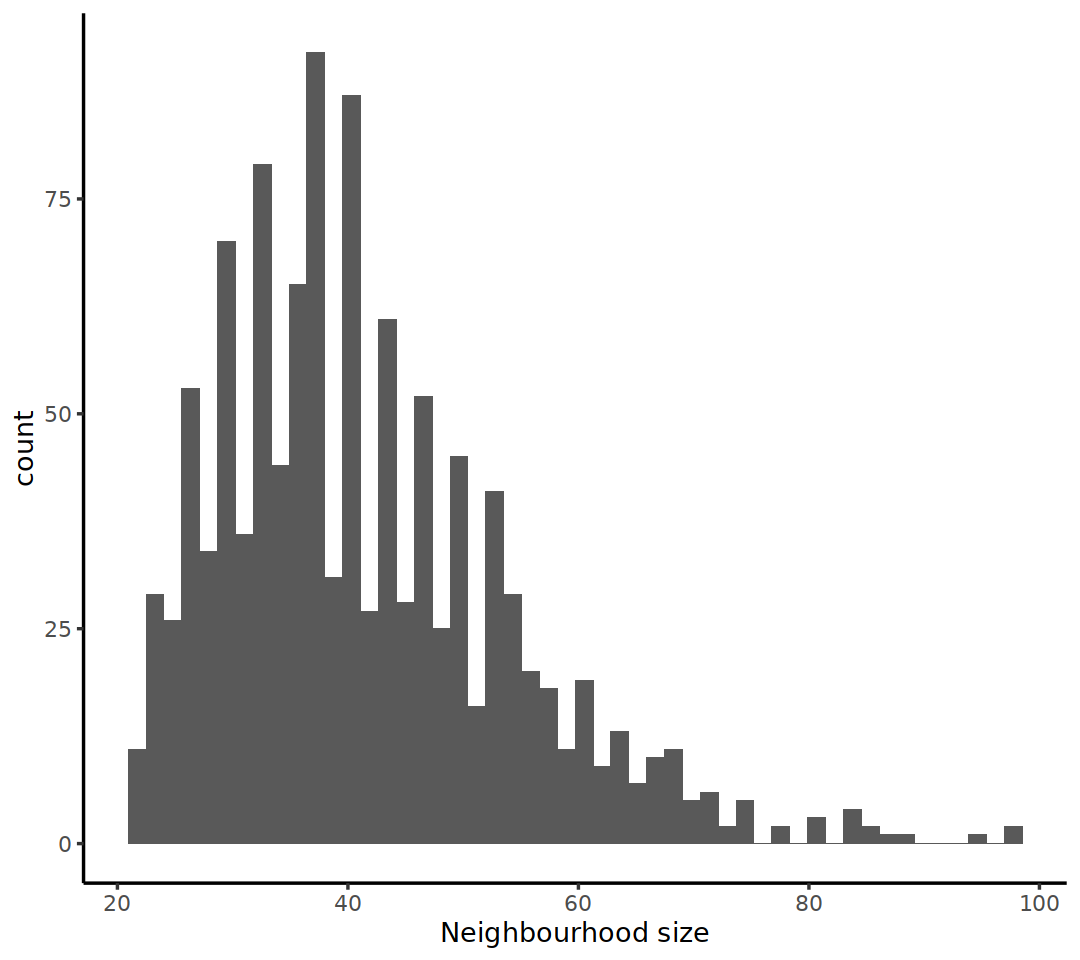

In [31]:
plotNhoodSizeHist(scmilo)

In [32]:
sc_design <- data.frame(colData(scmilo))[,c("sample", "group")]

In [33]:
sc_design <- distinct(sc_design)
rownames(sc_design) <- sc_design$sample

In [34]:
sc_design <- sc_design[colnames(nhoodCounts(scmilo)), , drop=FALSE]
table(sc_design$group)


     OS control 
      5       8 

In [35]:

#odDistance(scmilo, d = 20, reduced.dim = "PCA")

In [36]:
rownames(sc_design) <- sc_design$sample

In [37]:
sc_design$control = c(rep(1,4),rep(0,5),rep(1,4))
sc_design$OS = c(rep(0,4),rep(1,5),rep(0,4))

In [38]:
sc_design$control  = as.factor(sc_design$control )

In [39]:
sc_design$OS = as.factor(sc_design$OS )

In [40]:
model <- model.matrix(~ 0+group, data=sc_design)

In [41]:
model

,groupOS,groupcontrol
C1,0,1
C2,0,1
C3,0,1
C4,0,1
S1,0,1
S2,0,1
S3,0,1
S4,0,1
WH2109002886,1,0
WH2109013167,1,0


In [45]:
contrast.1 <- c("groupOS -  groupcontrol") # the syntax is <VariableName><ConditionLevel> - <VariableName><ControlLevel>
# we need to use the ~ 0 + Variable expression here so that we have all of the levels of our variable as separate columns in our model matrix
results <- testNhoods(scmilo, design = ~0 + group, design.df = sc_design, model.contrasts = contrast.1,
                         fdr.weighting="graph-overlap", norm.method="TMM")
table(results$SpatialFDR < 0.1)

Using TMM normalisation

Warning message in max(abs(logR)):
"no non-missing arguments to max; returning -Inf"
Performing spatial FDR correction withgraph-overlap weighting




FALSE  TRUE 
   34  1099 

In [46]:
results %>%
  arrange(SpatialFDR) %>%
  head() 

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-6.825792,12.40756,6.521248,0.01067111,0.03151841,1,0.03663037
2,5.898287,11.28416,5.815368,0.01590109,0.03151841,2,0.03663037
3,5.024065,10.83022,5.075102,0.02428916,0.03151841,3,0.03663037
4,5.552025,11.09004,5.422515,0.01989461,0.03151841,4,0.03663037
5,5.118678,10.87321,5.188389,0.02275514,0.03151841,5,0.03663037
6,-7.967926,13.38460,5.979827,0.01448416,0.03151841,6,0.03663037


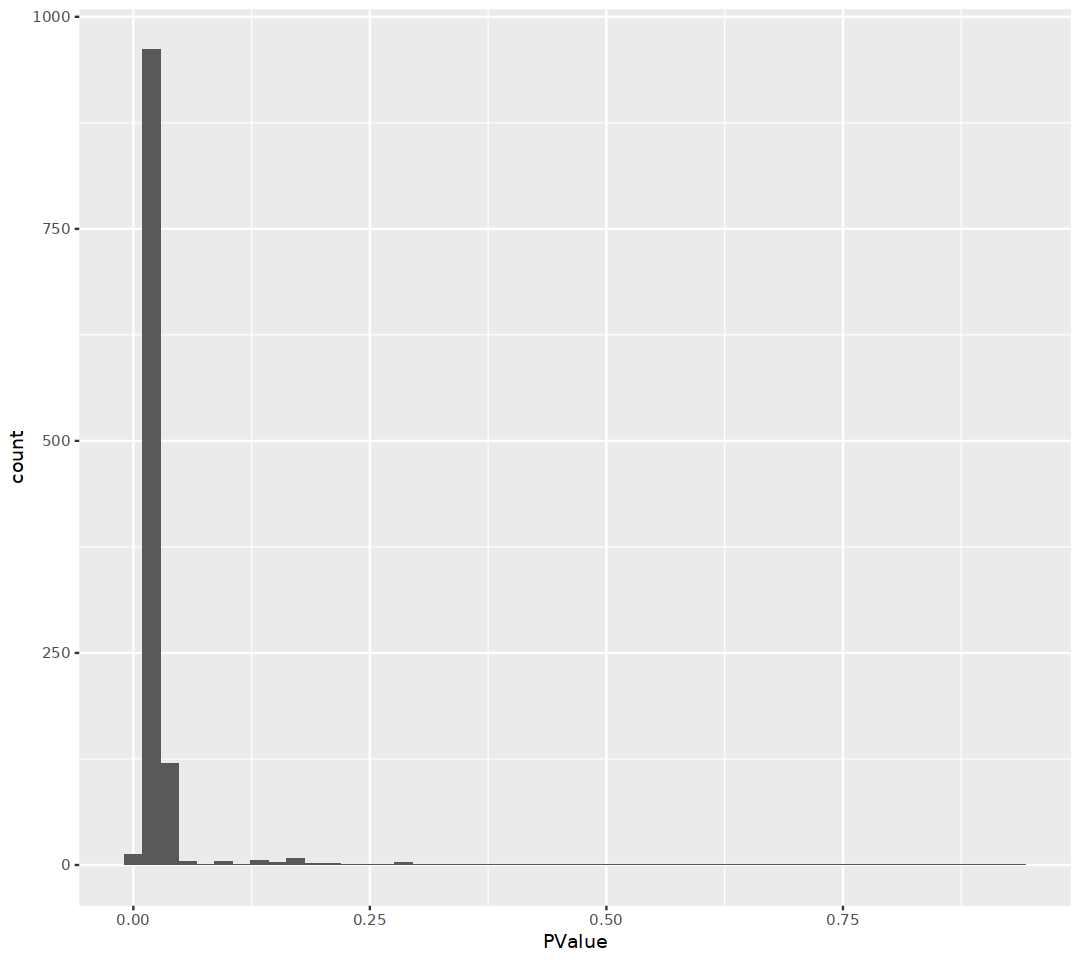

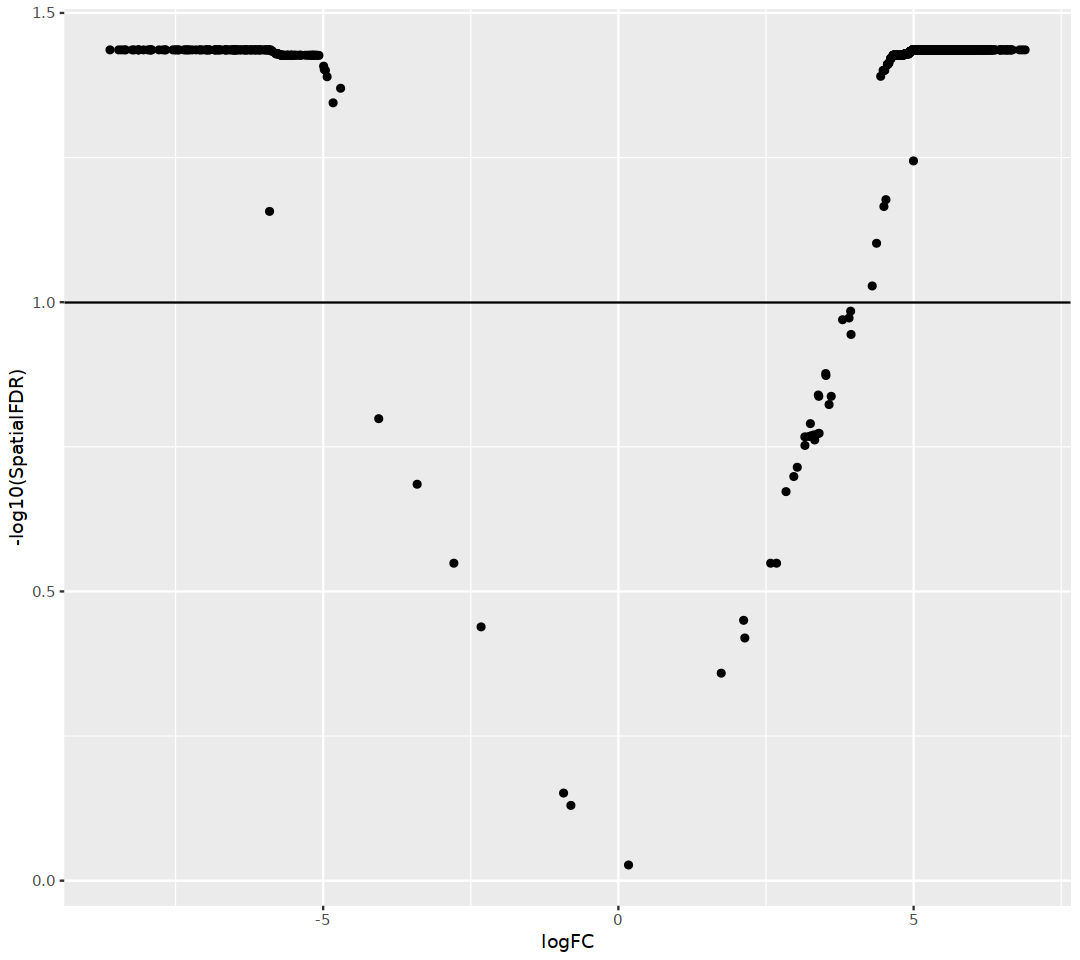

In [47]:
ggplot(results, aes(PValue)) + geom_histogram(bins=50)
ggplot(results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) 

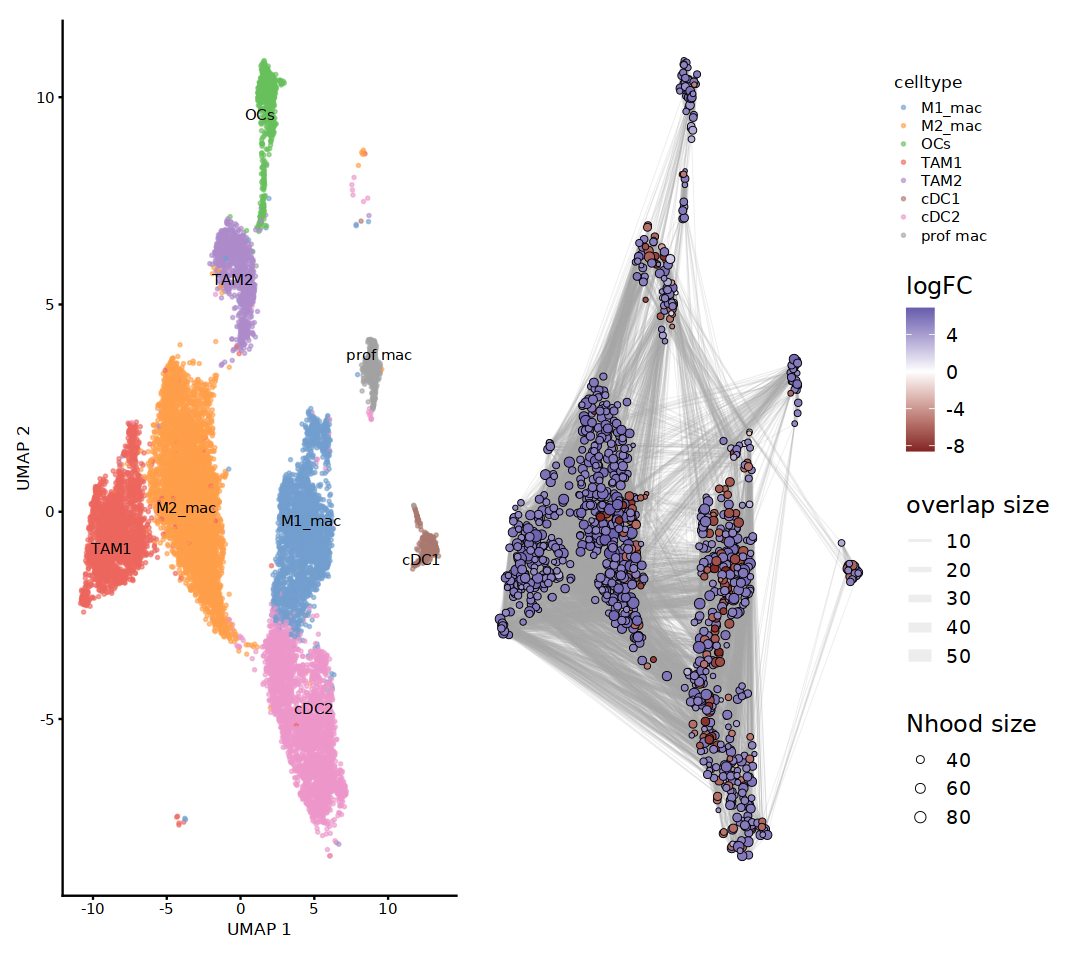

In [48]:
scmilo <- buildNhoodGraph(scmilo)
 
## Plot single-cell UMAP
umap_pl <- plotReducedDim(scmilo, dimred = "UMAP", 
                          colour_by="celltype", text_by = "celltype", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")
 
## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(scmilo, results, layout="UMAP",alpha = 1) 
 
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [49]:
results <- annotateNhoods(scmilo, results, coldata_col = "celltype")

Converting celltype to factor...



In [50]:
table(results$celltype)


  M1_mac   M2_mac      OCs     TAM1     TAM2     cDC1     cDC2 prof mac 
     190      407       50      171       72       20      200       23 

In [51]:
# https://rdrr.io/github/MarioniLab/miloR/f/vignettes/milo_contrasts.Rmd

Converting group.by to factor...



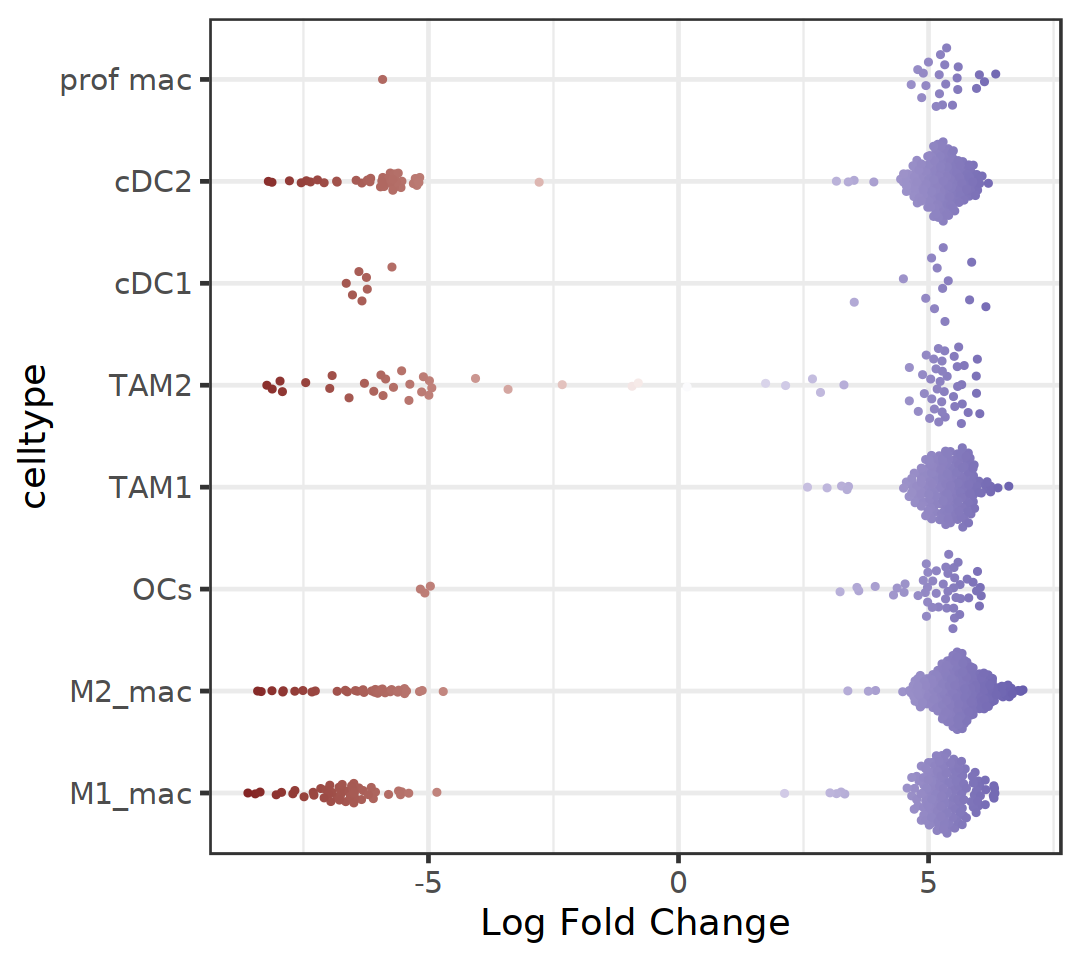

In [52]:
plotDAbeeswarm(results, group.by = "celltype",alpha = 1)